In [1]:
import json
import numpy as np
import random
from pysidt import MultiEvalSubgraphIsomorphicDecisionTree, Node, Datum
from pysidt.decomposition import atom_decomposition_noH
from pysidt.plotting import plot_tree
from molecule.molecule import *

In [2]:
with open("../data/rmgdbH298CHOstablenoringnoads.json",'r') as f:
    data = json.load(f)

In [3]:
training_data = []
for i,x in enumerate(data):
    d = Datum(Molecule().from_adjacency_list(x[0],check_consistency=True),x[1])
    dup = False
    for td in training_data:
        if td.mol.is_isomorphic(d.mol):
            dup = True
            break
    if not dup:
        training_data.append(d)

In [4]:
random.shuffle(training_data)
len(training_data)

184

In [5]:
train = training_data[:150]
test = []
test = training_data[150:]

In [6]:
root = Group().from_adjacency_list("""1 * R u0 px cx""")

sidt = MultiEvalSubgraphIsomorphicDecisionTree(atom_decomposition_noH,root_group=root,
                                               r=[ATOMTYPES[x] for x in ["C","O"]],
                                               r_bonds=[1,2,3,1.5],
                                                         r_un=[0],
                                              fract_nodes_expand_per_iter=0.1,
                                              )


In [7]:
sidt.generate_tree(data=train,test=test,max_nodes=4)

/home/hwpang/miniforge3/envs/pysidt/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
ERROR:root:training MAE: 33.250831220328685 kcal/mol
ERROR:root:test MAE: 25.341679255334494 kcal/mol
ERROR:root:# nodes: 1
/home/hwpang/Projects/pysidt_multi_eval/PySIDT/pysidt/sidt.py:375: RuntimeWarning: divide by zero encountered in double_scalars
  dy = self.data_delta[i]/len(self.mol_node_maps[datum]["mols"])
/home/hwpang/miniforge3/envs/pysidt/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
ERROR:root:training MAE: 24.57292252954172 kcal/mol
ERROR:root:test MAE: 20.41923707443485 kcal/mol
ERROR:root:# nodes: 3
/home/hwpang/Projects/pysidt_multi_eval/PySIDT/pysidt/sidt.py:3

adding node Root_1R->C
adding node Root_N-1R->C_Ext-1O-R_2C->O


/home/hwpang/miniforge3/envs/pysidt/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
ERROR:root:training MAE: 21.77856899706164 kcal/mol
ERROR:root:test MAE: 17.664562965464686 kcal/mol
ERROR:root:# nodes: 5
ERROR:root:Regularizing based on best test error
/home/hwpang/miniforge3/envs/pysidt/lib/python3.7/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
ERROR:root:training MAE: 21.77856876803349 kcal/mol
ERROR:root:test MAE: 17.14840868425096 kcal/mol
ERROR:root:# nodes: 5


In [8]:
sidt.regularize(data=train,check_data=True)

In [9]:
sidt.nodes

{'Root': <pysidt.sidt.Node at 0x7f8369d73a50>,
 'Root_1R->C': <pysidt.sidt.Node at 0x7f836a0971d0>,
 'Root_N-1R->C': <pysidt.sidt.Node at 0x7f8369b31610>,
 'Root_N-1R->C_Ext-1O-R_2C->O': <pysidt.sidt.Node at 0x7f8369b31290>,
 'Root_N-1R->C_Ext-1O-R_N-2C->O': <pysidt.sidt.Node at 0x7f83693773d0>}

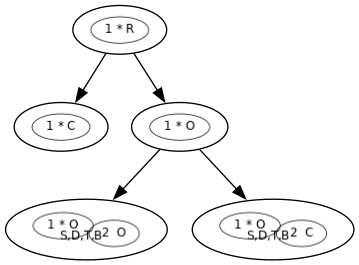

In [10]:
plot_tree(sidt,images=True)

In [11]:
train_error = [sidt.evaluate(d.mol) - d.value for d in train]
test_error = [sidt.evaluate(d.mol) - d.value for d in test]


In [12]:
np.mean(np.abs(np.array(train_error)))/4184.0

21.77856876803349

In [13]:
np.mean(np.abs(np.array(test_error)))/4184.0

17.14840868425096